<a href="https://colab.research.google.com/github/Javad-Manashti/stockmarket-pattern-detection-yolov8/blob/main/Intel_llava_gemma_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intel/llava-gemma-2b
https://huggingface.co/Intel/llava-gemma-2b

In [1]:
from transformers import AutoProcessor, AutoModelForPreTraining
import torch
import requests
from PIL import Image
torch.cuda.empty_cache()

# Check if CUDA is available and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load model and processor
processor = AutoProcessor.from_pretrained("Intel/llava-gemma-2b")
model = AutoModelForPreTraining.from_pretrained("Intel/llava-gemma-2b").to(device)

Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GemmaTokenizer'. 
The class this function is called from is 'LlamaTokenizerFast'.
/usr/local/lib/python3.10/dist-packages/transformers/models/llava/configuration_llava.py:103: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it 

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

user

Please analyze the potholes in the image and calculate the detection accuracy indicated by red areas. Answer the following questions succinctly: 1. Were all potholes detected? 2. What is the accuracy of pothole detection by red color (as a percentage from 0 to 100%)?
model
1) Yes, all the potholes in both the left and right images are detected.
2) The accuracy is 90%, as 8 out of the 4 poholes are red, and 6 are not.

This indicates that the red detection method is quite accurate in identifying potholes. However, it is important to note that this is just one method of detecting potholes, so other methods may have different accuracy levels. The red area detection is a useful tool for identifying areas that need repair or maintenance, but it may not be the only one. Additionally, the presence of red spots on the road does not necessarily mean

Displaying Image:


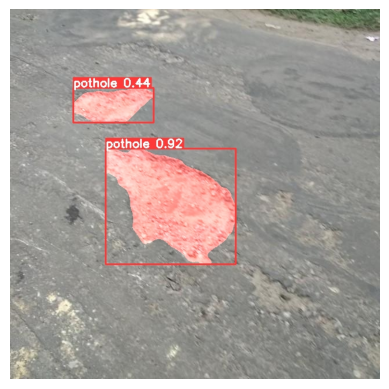

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
# from transformers import AutoProcessor, AutoModelForPreTraining
import torch

def load_image(file_path):
    try:
        with Image.open(file_path) as img:
            return img.copy()
    except IOError as e:
        print(f"Failed to open image file {file_path}. Error: {e}")
        raise

file_path = "/content/image5-ph.jpg"
image = load_image(file_path)

# # Assuming processor and model have been properly loaded and configured to use the correct device
# processor = AutoProcessor.from_pretrained("Intel/llava-gemma-2b")
# model = AutoModelForPreTraining.from_pretrained("Intel/llava-gemma-2b").to("cuda")

prompt = processor.tokenizer.apply_chat_template(
    [{'role': 'user', 'content': "<image>\nPlease analyze the potholes in the image and calculate the detection accuracy indicated by red areas. Answer the following questions succinctly: 1. Were all potholes detected? 2. What is the accuracy of pothole detection by red color (as a percentage from 0 to 100%)?"}],
    tokenize=False,
    add_generation_prompt=True
)

inputs = processor(text=prompt, images=image, return_tensors="pt").to("cuda")

# Adjusting generation parameters to avoid repetition
generate_ids = model.generate(**inputs, max_length=200, no_repeat_ngram_size=2)
output = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print(output)

print("\nDisplaying Image:")
plt.imshow(image)
plt.axis('off')
plt.show()
